## Domestic Military Bases for Fiscal Year 2015

We were able to obtain installation range data from a Department of Defense posting on Data.gov.  This is not a historical data set, but will be worth checking out.

Source: https://catalog.data.gov/dataset/military-installations-ranges-and-training-areas

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

None of the formats the pentagon help desk sent me were remotely familiar to me.  I will use python to convert the largest of these files from dbf format into a joined pandas data frame.

In [2]:
from simpledbf import Dbf5

In [3]:
base=Dbf5('MIRTA_Boundaries.dbf')
base=base.to_dataframe()
base.head()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,Army Guard,Orchard Range TS Boise,N/A,Idaho,United States,Active
1,Army Guard,"Fort Pickett, ARNG MTC",N/A,Virginia,United States,Active
2,Army Guard,Camp Dodge Johnston TS,N/A,Iowa,United States,Active
3,Army Guard,NG TS Clark Natl Forest Wappapello,N/A,Missouri,United States,Active
4,Army Guard,CTC Fort Custer Trng Center,N/A,Michigan,United States,Active


This first data frame contains 846 observations and documents the name of the base, operation status, location, and corresponding branch of the military.  I will now load in the second set of military base data I have from the pentagon zip file.

In [4]:
base2=Dbf5('MIRTA_Points.dbf')
base2=base2.to_dataframe()
base2.head()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,AF Guard,Luis Munoz Marin IAP,N/A,Puerto Rico,Puerto Rico,Active
1,AF Guard,NAS JRB New Orleans,N/A,Louisiana,United States,Active
2,AF Guard,Gulfport-Biloxi Regional Airport (ANG),N/A,Mississippi,United States,Active
3,AF Guard,Jacksonville IAP,N/A,Florida,United States,Active
4,AF Guard,Tucson IAP,N/A,Arizona,United States,Active


This frame follows the same format as the first and adds another 846 observations.  From inspection of the data I believe at least some of these observations to be distinct from the boundaries file.  I will append this second frame onto the first to form one consolidated data set.

In [5]:
base = base.append(base2)
base.head()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,Army Guard,Orchard Range TS Boise,N/A,Idaho,United States,Active
1,Army Guard,"Fort Pickett, ARNG MTC",N/A,Virginia,United States,Active
2,Army Guard,Camp Dodge Johnston TS,N/A,Iowa,United States,Active
3,Army Guard,NG TS Clark Natl Forest Wappapello,N/A,Missouri,United States,Active
4,Army Guard,CTC Fort Custer Trng Center,N/A,Michigan,United States,Active


In [6]:
base=base.reset_index(drop=True)
base.tail()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
1591,AF Active,Los Angeles Air Force Annex No.4,N/A,California,United States,Active
1592,Army Active,Fort Wainwright,N/A,Alaska,United States,Active
1593,Army Active,Fort Stewart,N/A,Georgia,United States,Active
1594,Army Reserve,Fort Hunter Liggett,N/A,California,United States,Active
1595,Army Active,Fort Drum,N/A,New York,United States,Active


In [7]:
base.describe()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
count,1596,1596,1596,1596,1596,1596
unique,10,845,15,53,3,2
top,Navy Active,NAS JRB New Orleans,N/A,California,United States,Active
freq,474,3,1459,174,1524,1510


In [8]:
base['COUNTRY'].value_counts()

United States    1524
Guam               54
Puerto Rico        18
Name: COUNTRY, dtype: int64

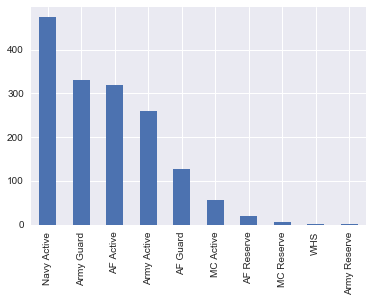

In [9]:
base['COMPONENT'].value_counts().plot(kind='bar')
plt.show()

In [10]:
base=base.sort_values('STATE_TERR').reset_index(drop=True)
base.tail()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
1591,AF Active,F E Warren AFB,N/A,Wyoming,United States,Active
1592,Army Guard,MTCH Camp Guernsey,N/A,Wyoming,United States,Active
1593,Army Guard,MTCH Camp Guernsey,N/A,Wyoming,United States,Active
1594,AF Guard,Cheyenne Regional Apt,N/A,Wyoming,United States,Active
1595,AF Guard,Cheyenne Regional Apt,N/A,Wyoming,United States,Active


Looking at this data frame in alphabetical order gives the added benefit of confirming my suspicion of duplicates in the data.  I confirm this by looking at more of the frame.

In [11]:
base

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,Navy Active,NOLF Wolf,N/A,Alabama,United States,Active
1,AF Guard,Birmingham Airport,N/A,Alabama,United States,Active
2,Army Active,10C Stagefield,N/A,Alabama,United States,Active
3,AF Guard,Montgomery Regional Airport ANGB,N/A,Alabama,United States,Active
4,Navy Active,NOLF Summerdale,N/A,Alabama,United States,Active
5,Navy Active,NOLF Silverhill,N/A,Alabama,United States,Active
6,Navy Active,NOLF Evergreen,N/A,Alabama,United States,Active
7,Army Guard,Fort McClellan ARNG Training Center,N/A,Alabama,United States,Active
8,Navy Active,NOLF Brewton,N/A,Alabama,United States,Active
9,Navy Active,Barin Field,N/A,Alabama,United States,Active


Line 0 and line 13 are exactly the same and a cursory glance yields several more examples.  I decide to drop duplicates.  Before I save this change to the original data frame I can take a view of the frame to make sure it does what I want.  Sure enough, the duplicate NOLF Wolf base has been dropped.  I will resave the data frame and reset the index.

In [12]:
base.drop_duplicates().head(15)

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,Navy Active,NOLF Wolf,N/A,Alabama,United States,Active
1,AF Guard,Birmingham Airport,N/A,Alabama,United States,Active
2,Army Active,10C Stagefield,N/A,Alabama,United States,Active
3,AF Guard,Montgomery Regional Airport ANGB,N/A,Alabama,United States,Active
4,Navy Active,NOLF Summerdale,N/A,Alabama,United States,Active
5,Navy Active,NOLF Silverhill,N/A,Alabama,United States,Active
6,Navy Active,NOLF Evergreen,N/A,Alabama,United States,Active
7,Army Guard,Fort McClellan ARNG Training Center,N/A,Alabama,United States,Active
8,Navy Active,NOLF Brewton,N/A,Alabama,United States,Active
9,Navy Active,Barin Field,N/A,Alabama,United States,Active


In [13]:
base=base.drop_duplicates().reset_index(drop=True)
base.head(15)

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,Navy Active,NOLF Wolf,N/A,Alabama,United States,Active
1,AF Guard,Birmingham Airport,N/A,Alabama,United States,Active
2,Army Active,10C Stagefield,N/A,Alabama,United States,Active
3,AF Guard,Montgomery Regional Airport ANGB,N/A,Alabama,United States,Active
4,Navy Active,NOLF Summerdale,N/A,Alabama,United States,Active
5,Navy Active,NOLF Silverhill,N/A,Alabama,United States,Active
6,Navy Active,NOLF Evergreen,N/A,Alabama,United States,Active
7,Army Guard,Fort McClellan ARNG Training Center,N/A,Alabama,United States,Active
8,Navy Active,NOLF Brewton,N/A,Alabama,United States,Active
9,Navy Active,Barin Field,N/A,Alabama,United States,Active


When I take a tail  of the data frame I can see that the vast majority of the rows added from my second dbf file were duplicates (First data frame had 846 rows each with a unique Site Name).  

In [14]:
base.tail(10)

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
840,Navy Active,Allegany Ballistics Lab,N/A,West Virginia,United States,Active
841,Navy Active,NIOC Sugar Grove,N/A,West Virginia,United States,Active
842,AF Guard,Truax ANGB,N/A,Wisconsin,United States,Active
843,Army Guard,Camp Williams Tomah MTA,N/A,Wisconsin,United States,Active
844,Army Active,Badger AAP,N/A,Wisconsin,United States,Inactive
845,AF Guard,Gen Mitchell IAP,N/A,Wisconsin,United States,Active
846,AF Guard,Volk ANGB,N/A,Wisconsin,United States,Active
847,AF Active,F E Warren AFB,N/A,Wyoming,United States,Active
848,Army Guard,MTCH Camp Guernsey,N/A,Wyoming,United States,Active
849,AF Guard,Cheyenne Regional Apt,N/A,Wyoming,United States,Active


We've got our set so let's export to a csv file.

In [15]:
base.to_csv("base.csv") #saves cleaned data to same folder as notebook

## Base Geometry

After talking with Dr. Iverson, I learned that shp files contain the geometric points we're looking for.  I'll make use of the Geopandas package to examine these files.

In [15]:
import geopandas as gpd
geobase= gpd.GeoDataFrame.from_file("MIRTA_Points.shp")

In [17]:
geobase.tail()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT,geometry
841,AF Active,Los Angeles Air Force Annex No.4,N/A,California,United States,Active,POINT (-118.28610728922 33.71849511835507)
842,Army Active,Fort Wainwright,N/A,Alaska,United States,Active,POINT (-147.624595823 64.82473439800003)
843,Army Active,Fort Stewart,N/A,Georgia,United States,Active,POINT (-81.61652302699997 31.99367259100006)
844,Army Reserve,Fort Hunter Liggett,N/A,California,United States,Active,POINT (-121.2539465569999 35.95562608600005)
845,Army Active,Fort Drum,N/A,New York,United States,Active,POINT (-75.59222698799994 44.12440032500007)


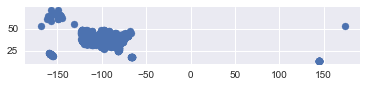

In [18]:
geobase.plot()

This looks like what we want! We can merge the base and geobase:

In [19]:
result= pd.merge(base,geobase, how='outer',
                 on= ['COMPONENT','SITE_NAME', 'JOINT_BASE', 'STATE_TERR', 'COUNTRY', 'OPER_STAT'])

In [22]:
result=result.sort_values(['STATE_TERR', 'SITE_NAME']).reset_index(drop=True)
result.head()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT,geometry
0,Army Active,10C Stagefield,N/A,Alabama,United States,Active,POINT (-85.92999999940042 31.40000000029983)
1,Army Guard,AASF 02 Birmingham,N/A,Alabama,United States,Active,POINT (-86.75056081599996 33.57194567700003)
2,Army Active,Allen Stagefield,N/A,Alabama,United States,Active,POINT (-85.65067792924299 31.23043015932444)
3,Army Active,Anniston Army Depot,N/A,Alabama,United States,Active,POINT (-85.96910637555874 33.65302458042009)
4,Navy Active,Barin Field,N/A,Alabama,United States,Active,POINT (-87.6302432365361 30.39023979053394)


In [28]:
result['geometry'].value_counts(dropna=False).head()

NaN                                             4
POINT (-65.63332999928002 18.25000000049965)    2
POINT (-81.79254881117868 24.56438300457205)    1
POINT (-157.9395235599643 21.37781595774032)    1
POINT (-157.8840334076156 21.34434556269758)    1
Name: geometry, dtype: int64

This doesn't actually seem helpful.  The Geobase frame has everything we need so we can attend to just that frame.

In [27]:
geobase=geobase.sort_values(['STATE_TERR','SITE_NAME']).reset_index(drop=True)
geobase.head()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT,geometry
0,Army Active,10C Stagefield,N/A,Alabama,United States,Active,POINT (-85.92999999940042 31.40000000029983)
1,Army Guard,AASF 02 Birmingham,N/A,Alabama,United States,Active,POINT (-86.75056081599996 33.57194567700003)
2,Army Active,Allen Stagefield,N/A,Alabama,United States,Active,POINT (-85.65067792924299 31.23043015932444)
3,Army Active,Anniston Army Depot,N/A,Alabama,United States,Active,POINT (-85.96910637555874 33.65302458042009)
4,Navy Active,Barin Field,N/A,Alabama,United States,Active,POINT (-87.6302432365361 30.39023979053394)


Now we can save this sorted frame, complete with the geometric points we need, to csv.

In [76]:
geobase.to_csv("geobase.csv")